In [16]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
tqdm.pandas()

In [2]:
# Loading Json file
with open("books.json", "r", encoding="utf-8") as file:
    books = json.load(file)

In [3]:
books_df = pd.DataFrame(books)
books_df.head()

,book_name,author_name,number_of_books_by_author,number_of_followers,publish_date,number_of_pages,overall_rating,total_num_rating,total_num_reviews,genre,Review 1,Review 2,Review 3,Review 4,Review 5,Review 6,Review 7,Review 8,Review 9,Review 10
0,None of This Is True,Lisa Jewell,63,77700,"July 20, 2023",390,4.10,815988,84036,Thriller,I’m speechless after reading this bone chillin...,4 1/2 stars. I want to start by saying: this w...,None of This is True couldn’t be more apt for ...,Okay this is definitely an interesting ride. T...,I don't know how to feel about this 😵‍💫 (but I...,2.5⭐️ the best part of this book is that it's ...,"Compared to Jewell's previous few books, I lik...",Trust Your Instincts\n\nNone of This is True i...,It took me awhile to sort out my thoughts on t...,Lisa Jewell's latest Psychological Thriller gr...
1,What the Wife Knew,Darby Kane,5,1621,"December 10, 2024",368,3.59,8689,1395,Thriller,Outlier review! 🫣\n\nI was THRILLED to receive...,Triple wow once again! This book really gave m...,OH. MY. GOD!!! There are simply no words for t...,War of the roses!🔪🌹\nDoes anyone come away uns...,Audio upped this to a 3.5 ⭐\n\nThe beginning w...,3.5 stars— One thing I can always say about Da...,What a convoluted non event this turned out to...,Since Pretty Little Wife.. I have been hooked ...,I was absolutely thrilled when I won this as a...,One of the best parts of being part of Thrille...
2,The Resurrectionist,A. Rae Dunlap,2,199,"December 24, 2024",336,3.92,1852,608,Historical Fiction,This is a historical fiction debut novel by A....,4.5 ☆\n\nWhat a stunning debut! The writing wa...,"I really hoped to love this book, and while I ...",I'd like to thank Edelweiss and the publisher ...,"With wit as sharp as a scalpel, and a plot as ...",insane behavior all around - loved it,“The resurrectionist” is a historical fiction ...,A naive young medical student joins a group of...,My heartfelt thanks to NetGalley and Kensingto...,I picked this book knowing only that it involv...
3,What the Woods Took,Courtney Gould,5,800,"December 10, 2024",336,3.98,2263,776,Horror,"WOWZA!\n\nGripping, tense, dark, horrific and ...",UPDATE 1.3.24:\nThe cover has been revealed! W...,Hey Siri- Please play Teenagers by My Chemical...,courtney gould said we will need therapy so i'...,a tense and eye opening read that follows a gr...,I was hooked by chapter 3. It's just so creepy...,"The Sisters are at it again, rambling and swap...","The Sisters are at it again, rambling and swap...",somehow this is the second book i've read so f...,"It’s the middle of the night, and Devin Green ..."
4,I Might Be in Trouble,Daniel Aleman,3,294,"December 3, 2024",336,3.67,2790,647,Mystery,I guess...one of the things I’ve realized is t...,"In a Nutshell: A dark, almost satirical comedy...",When I originally picked up I Might Be in Trou...,I am going to shout about this book to the roo...,I would first like to thank net galley and Hac...,Thank you to @grandcentralpub for an advance p...,Here’s the recipe for this book’s magic: start...,LOOOOVELY!!,This dark comedy is a meta-exploration about t...,I Might Be in Trouble by Daniel Aleman. Thanks...


**Cleaning the review text**

In [4]:
def clean_review_text(text):
    if pd.isna(text):  # Handle missing values
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove URLs (http://, https://, www.)
    text = re.sub(r'http[s]?://\S+|www\.\S+', '', text)

    # Remove newlines, tabs, and extra spaces
    text = text.replace("\n", " ").replace("\t", " ").strip()

    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)

    return text

In [5]:
for i in range(1,11):
    books_df[f'Review {i}'] = books_df[f'Review {i}'].astype(str).apply(clean_review_text)

## VADER Seniment Scoring

using ```SentimentIntensityAnalyzer``` to get the negative/positive/neutral scores of the text.

In [6]:
# SentimentIntensityAnalyzer Object
sia = SentimentIntensityAnalyzer()

In [11]:
# Function to calculate the compound polarity score
def get_polarity(text):
    return sia.polarity_scores(str(text))['compound']

In [17]:
for i in tqdm(range(1, 11), desc="Processing Sentiments"):
    books_df[f"Review {i}_sentiment"] = books_df[f"Review {i}"].progress_apply(get_polarity)

Processing Sentiments: 100%|███████████████████████████████████████████████████████████| 10/10 [00:10<00:00,  1.06s/it]


In [ ]:
books_df["Average_Sentiment_Score"] = books_df.loc[:,"Review 1_sentiment":].mean(axis=1)

C:\Users\shyam\AppData\Local\Temp\ipykernel_10084\1666133120.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


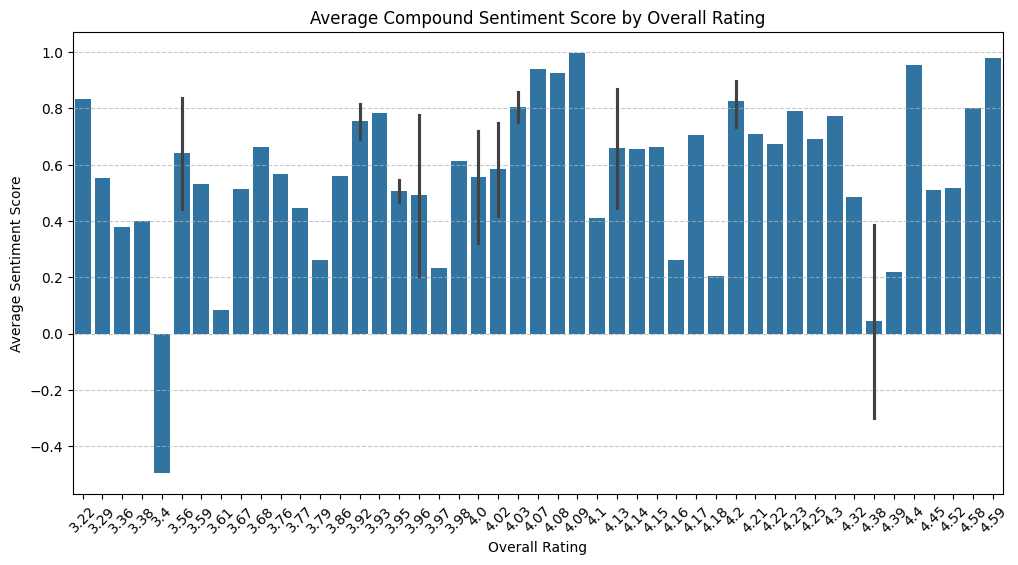

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=books_df, x="overall_rating", y="Average_Sentiment_Score", ax=ax)
ax.set_title("Average Compound Sentiment Score by Overall Rating")
ax.set_xlabel("Overall Rating")
ax.set_ylabel("Average Sentiment Score")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\shyam\AppData\Local\Temp\ipykernel_10084\3456663862.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


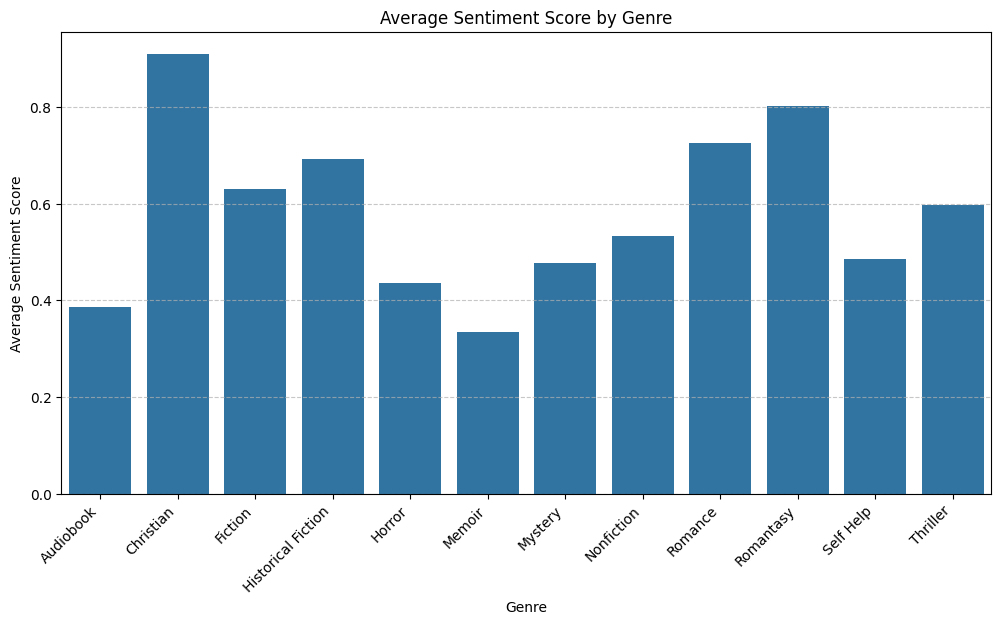

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
genre_sentiment = books_df.groupby("genre")["Average_Sentiment_Score"].mean().reset_index()
sns.barplot(data=genre_sentiment, x="genre", y="Average_Sentiment_Score", ax=ax)

# ✅ Customize the plot
ax.set_title("Average Sentiment Score by Genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Average Sentiment Score")

# ✅ Rotate x-axis labels for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# ✅ Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# ✅ Show the plot
plt.show()
